In [5]:
import fastf1
import fastf1.plotting
fastf1.Cache.enable_cache('cache')
fastf1.plotting.setup_mpl(color_scheme='fastf1')

from datetime import datetime

In [2]:
# getting the qualification

today = datetime.today()
year = today.year
circuit = 1
event = 'Q' # qualification

session = fastf1.get_session(year, circuit, event)
session.load()

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.2]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '63', '22', '23', '16', '44', '10', '55', '6', '14', '18', '7', '5', '12', '27', '30', '31', 

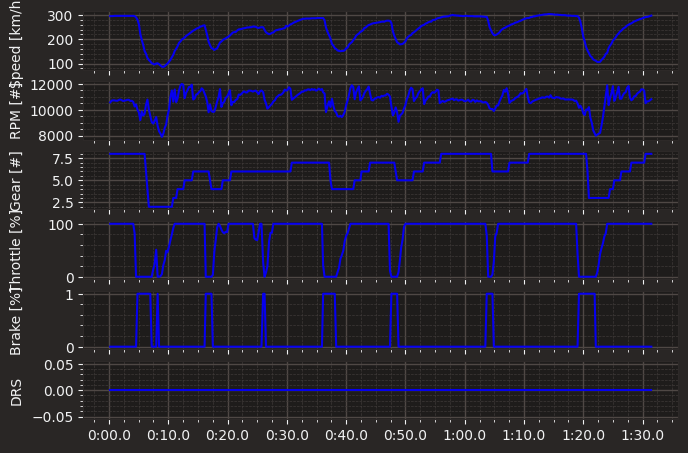

In [62]:
fastest_lap = session.laps.pick_drivers("VER").pick_fastest()
first_color = fastf1.plotting.get_team_color("Redbull", session)
first_car = fastest_lap.get_car_data().add_distance()

fig, ax = plt.subplots(6)

l1, = ax[0].plot(first_car['Time'], first_car['Speed'], color=first_color)
ax[1].plot(first_car['Time'], first_car['RPM'], color=first_color)
ax[2].plot(first_car['Time'], first_car['nGear'], color=first_color)
ax[3].plot(first_car['Time'], first_car['Throttle'], color=first_color)
ax[4].plot(first_car['Time'], first_car['Brake'], color=first_color)
ax[5].plot(first_car['Time'], first_car['DRS'], color=first_color)

ax[0].set_ylabel("Speed [km/h]")
ax[1].set_ylabel("RPM [#]")
ax[2].set_ylabel("Gear [#]")
ax[3].set_ylabel("Throttle [%]")
ax[4].set_ylabel("Brake [%]")
ax[5].set_ylabel("DRS")

ax[0].get_xaxis().set_ticklabels([])
ax[1].get_xaxis().set_ticklabels([])
ax[2].get_xaxis().set_ticklabels([])
ax[3].get_xaxis().set_ticklabels([])
ax[4].get_xaxis().set_ticklabels([])

fig.align_ylabels()

plt.subplots_adjust(left=0.06 ,right=0.99, top=0.9, bottom=0.05)
plt.show()


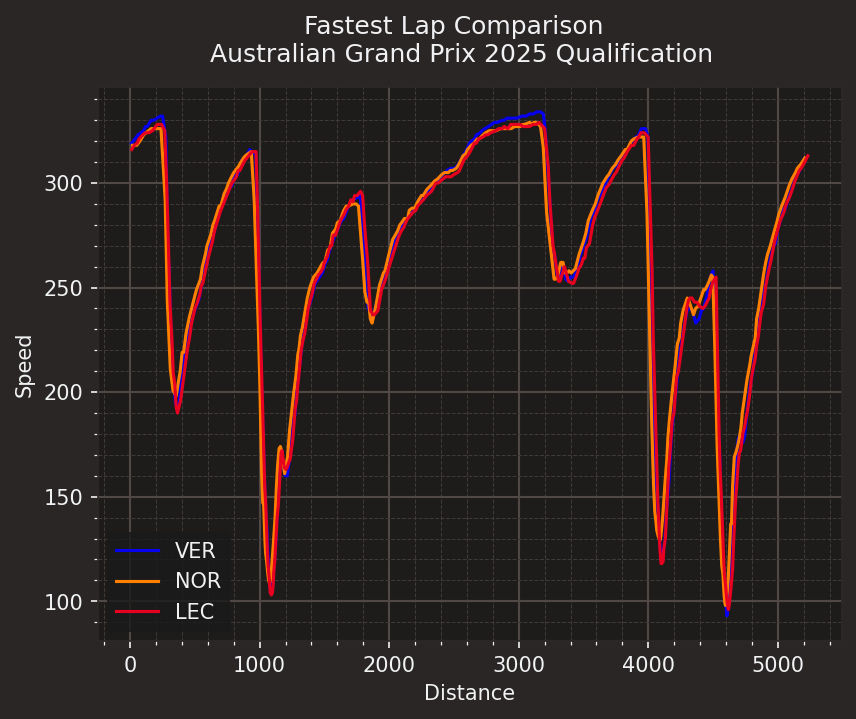

In [30]:
import matplotlib.pyplot as plt

def get_fastests_d_v(driver, session):
    fast = session.laps.pick_drivers(driver).pick_fastest()
    car_data = fast.get_car_data().add_distance()
    d = car_data['Distance']
    v = car_data['Speed']
    return d, v

ver_d, ver_v = get_fastests_d_v('VER', session)
nor_d, nor_v = get_fastests_d_v('NOR', session)
lec_d, lec_v = get_fastests_d_v('LEC', session)

rbr_color = fastf1.plotting.get_team_color('Redbull', session)
mcl_color = fastf1.plotting.get_team_color('McLaren', session)
fer_color = fastf1.plotting.get_team_color('Ferrari', session)

fig, ax = plt.subplots()
ax.plot(ver_d, ver_v, color=rbr_color, label='VER')
ax.plot(nor_d, nor_v, color=mcl_color, label='NOR')
ax.plot(lec_d, lec_v, color=fer_color, label='LEC')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualification")

fig.set_dpi(150)
ax.set(xlabel='Distance', ylabel='Speed')

plt.show()